In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [70]:
import io

In [71]:
from google.colab import files
uploaded = files.upload()

Saving TSM.csv to TSM.csv


In [72]:
df = pd.read_csv(io.BytesIO(uploaded['TSM.csv']))
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0      1/4/2010  11.490000  11.690000  11.470000  11.580000   7.458041   
1      1/5/2010  11.600000  11.660000  11.460000  11.530000   7.425838   
2      1/6/2010  11.560000  11.610000  11.380000  11.490000   7.400078   
3      1/7/2010  11.410000  11.440000  11.070000  11.110000   7.155339   
4      1/8/2010  11.140000  11.220000  11.030000  11.100000   7.148899   
...         ...        ...        ...        ...        ...        ...   
2635  6/23/2020  56.639999  57.160000  56.529999  56.759998  53.146317   
2636  6/24/2020  56.709999  57.060001  56.160000  56.580002  52.977772   
2637  6/25/2020  56.560001  57.090000  55.950001  57.040001  53.408482   
2638  6/26/2020  57.000000  57.259998  56.209999  56.330002  52.743690   
2639  6/29/2020  56.340000  56.410000  55.660000  56.389999  52.799870   

        Average  
0     10.737608  
1     10.735168  
2     10.688016  
3     10.437068  
4     10.327780  
...

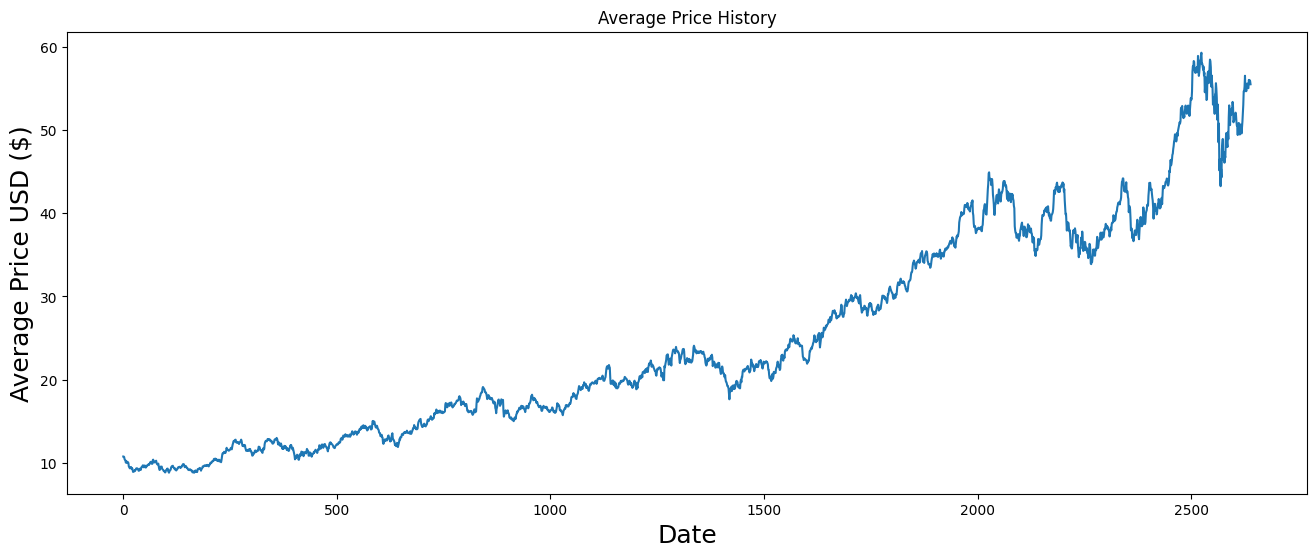

In [73]:
plt.figure(figsize=(16,6))
plt.title('Average Price History')
plt.plot(df['Average'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.show()

In [74]:
data = df.filter(['Average'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.95 ))
window_size = 60
training_data_len

2508

In [75]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
print('scaled_data.shape', len(dataset))
scaled_data

scaled_data.shape 2640


array([[-1.11093536],
       [-1.1111257 ],
       [-1.11480303],
       ...,
       [ 2.4197889 ],
       [ 2.41191519],
       [ 2.38159588]])

In [76]:
train_data = scaled_data[0: int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= window_size + 1:
      print('x_train', x_train)
      print('\n y_train', y_train)
      print()

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('x_train.shape', x_train.shape)

x_train [array([-1.11093536, -1.1111257 , -1.11480303, -1.1343742 , -1.14289746,
       -1.14630779, -1.1682847 , -1.16094854, -1.15675033, -1.17053708,
       -1.16380109, -1.16416058, -1.17219731, -1.20373642, -1.21124459,
       -1.21945845, -1.22252248, -1.21848822, -1.2088044 , -1.21647108,
       -1.22407168, -1.2218193 , -1.23733499, -1.25538607, -1.25160827,
       -1.24874515, -1.24976829, -1.23850094, -1.24249287, -1.23580439,
       -1.22487272, -1.22135137, -1.22253306, -1.22242203, -1.23032398,
       -1.23546065, -1.24443069, -1.2436508 , -1.22838355, -1.22495204,
       -1.22850776, -1.23620622, -1.21908836, -1.2088811 , -1.20680846,
       -1.20044512, -1.19306662, -1.1969581 , -1.21165698, -1.20749848,
       -1.19496209, -1.19716959, -1.21371901, -1.21359478, -1.20707545,
       -1.20241733, -1.19371427, -1.19416107, -1.18798546, -1.18414153])]

 y_train [-1.190671450878834]

x_train [array([-1.11093536, -1.1111257 , -1.11480303, -1.1343742 , -1.14289746,
       -1.14

In [77]:
print(x_train.shape[1])

60


In [78]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
!pip install layers

In [79]:
import tensorflow as tf

In [80]:
def build_lstm_model():
  input = tf.keras.layers.Input(shape = (x_train.shape[1], 1), name = 'input')
  x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences = True))(input)
  x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences = False, dropout = 0.5))(x)
  output = tf.keras.layers.Dense(1, name = "last_dense")(x)
  model = tf.keras.Model(inputs = input, outputs = output)
  return model

LSTM_model = build_lstm_model()
LSTM_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 60, 256)           133120    
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 last_dense (Dense)          (None, 1)                 129       
                                                                 
Total params: 297601 (1.14 MB)
Trainable params: 297601 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
epochs = 50
batch_size = 32
early_stopping_patience = 20

LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
price = LSTM_model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/50
13/77 [====>.........................] - ETA: 28s - loss: 0.0031

KeyboardInterrupt: 

In [83]:
test_data = scaled_data[training_data_len - window_size: ]
print('len(test_data): ', len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i - window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = LSTM_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data):  192
5/5 [==============================] - 7s 142ms/step


1.4544735804659068

<ipython-input-84-8f188311654f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


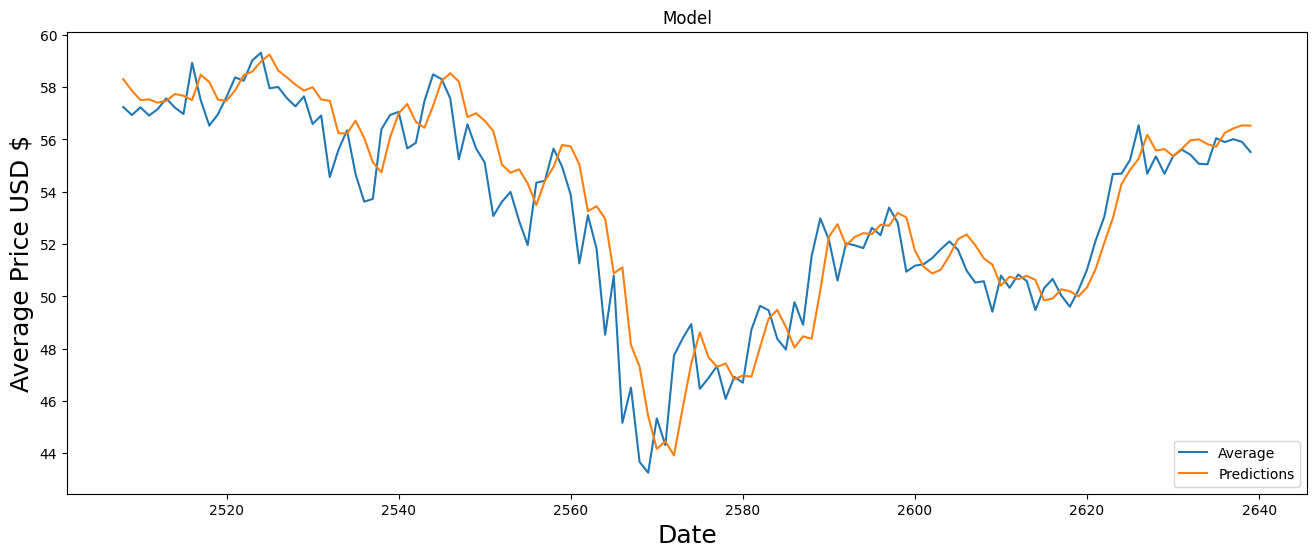

In [84]:
train = data[: training_data_len]
test = data[training_data_len: ]
test['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Average Price USD $', fontsize = 18)
plt.plot(test[['Average', 'Predictions']])
plt.legend(['Average', 'Predictions'], loc = 'lower right')
plt.show()

In [85]:
test[:]

,Average,Predictions
2508,57.240189,58.304516
2509,56.932666,57.865841
2510,57.228064,57.504391
2511,56.913363,57.532543
2512,57.157586,57.406685
...,...,...
2635,56.047263,55.718609
2636,55.897555,56.245327
2637,56.009697,56.423077
2638,55.908738,56.534393
